In [1]:
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_membrane = './md_arpeggio_int.csv'
df_membrane = pd.read_csv(path_membrane).fillna(0)
df_membrane['md'] = 'membrane'
path_solvent = './md_solvent_arpeggio_int.csv'
df_solvent = pd.read_csv(path_solvent).fillna(0)
df_solvent['md'] = 'water'

In [3]:
df_membrane['name'] = [i.split('_')[0].upper() for i in df_membrane['ID']]
df_membrane['type'] = [i.split('_')[1].capitalize() for i in df_membrane['ID']]
df_membrane['frame'] = [int(i.split('_')[-1]) for i in df_membrane['ID']]
df_membrane = df_membrane.replace({'Cryoem': 'Cryo-EM', 'Qty': 'QTY in membrane', 'native': 'Native'})
#d_order = {'Cryo-EM': 2, 'Native': 1, 'QTY': 0}
d_order = {'Cryo-EM': 2, 'Native': 0, 'QTY in membrane': 1}
df_membrane['order'] = [d_order[t] for t in df_membrane['type']]
df_membrane = df_membrane.sort_values(by = ['name', 'order'])
df_membrane = df_membrane[df_membrane['frame'] >= 30]

In [4]:
df_solvent['name'] = [i.split('_')[0].upper() for i in df_solvent['ID']]
df_solvent['type'] = [i.split('_')[1].capitalize() for i in df_solvent['ID']]
df_solvent['frame'] = [int(i.split('_')[-1]) for i in df_solvent['ID']]
df_solvent = df_solvent.replace({'Cryoem': 'Cryo-EM', 'Qty': 'QTY in water', 'native': 'Native'})
df_solvent = df_solvent[df_solvent['name'].isin(['KCNJ11', 'KCNN4'])]
#d_order = {'Cryo-EM': 2, 'Native': 1, 'QTY': 0}
d_order = {'Cryo-EM': 2, 'Native': 0, 'QTY in water': 1}
df_solvent['order'] = [d_order[t] for t in df_solvent['type']]
df_solvent = df_solvent.sort_values(by = ['name', 'order'])
df_solvent = df_solvent[(df_solvent['frame'] >= 20) & (df_solvent['frame'] <= 30)]

In [5]:
df = pd.concat([df_membrane, df_solvent]).fillna(0)
d_order = {'Cryo-EM': 0, 'Native': 1, 'QTY in membrane': 2, 'QTY in water': 3}
df['order'] = [d_order[t] for t in df['type']]
df = df.sort_values(by = ['name', 'order'])

In [6]:
df

,ID,proximal,hydrophobic,vdw_clash,weak_polar,polar,vdw,carbonyl,aromatic,ionic,INTRA_SELECTION,atom-atom,distance,hbond,md,name,type,frame,order,covalent
7,KCNJ11_cryoem_400ns_centered_protein_h_frame_36,3479,195,92,80,164,59,8,19.0,6.0,3630,3630,4.299490,1.0,membrane,KCNJ11,Cryo-EM,36,0,0.0
15,KCNJ11_cryoem_400ns_centered_protein_h_frame_31,3289,191,89,73,162,66,9,16.0,5.0,3444,3444,4.285508,3.0,membrane,KCNJ11,Cryo-EM,31,0,0.0
17,KCNJ11_cryoem_400ns_centered_protein_h_frame_39,3444,198,85,81,155,72,8,13.0,6.0,3601,3601,4.292835,1.0,membrane,KCNJ11,Cryo-EM,39,0,0.0
28,KCNJ11_cryoem_400ns_centered_protein_h_frame_38,3494,200,83,79,157,56,8,14.0,6.0,3633,3633,4.298054,1.0,membrane,KCNJ11,Cryo-EM,38,0,0.0
37,KCNJ11_cryoem_400ns_centered_protein_h_frame_40,3380,224,87,80,154,59,5,17.0,7.0,3526,3526,4.284699,1.0,membrane,KCNJ11,Cryo-EM,40,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,KCNN4_qty_solvent_centered_protein_h_frame_26,9089,356,272,221,456,182,19,16.0,41.0,9543,9543,4.288719,5.0,water,KCNN4,QTY in water,26,3,0.0
62,KCNN4_qty_solvent_centered_protein_h_frame_29,9360,405,248,186,436,149,14,25.0,34.0,9757,9757,4.293180,2.0,water,KCNN4,QTY in water,29,3,0.0
69,KCNN4_qty_solvent_centered_protein_h_frame_20,9174,348,296,241,491,167,22,20.0,31.0,9637,9637,4.285122,3.0,water,KCNN4,QTY in water,20,3,0.0
75,KCNN4_qty_solvent_centered_protein_h_frame_28,9421,383,260,241,478,187,24,27.0,38.0,9868,9868,4.286024,7.0,water,KCNN4,QTY in water,28,3,0.0


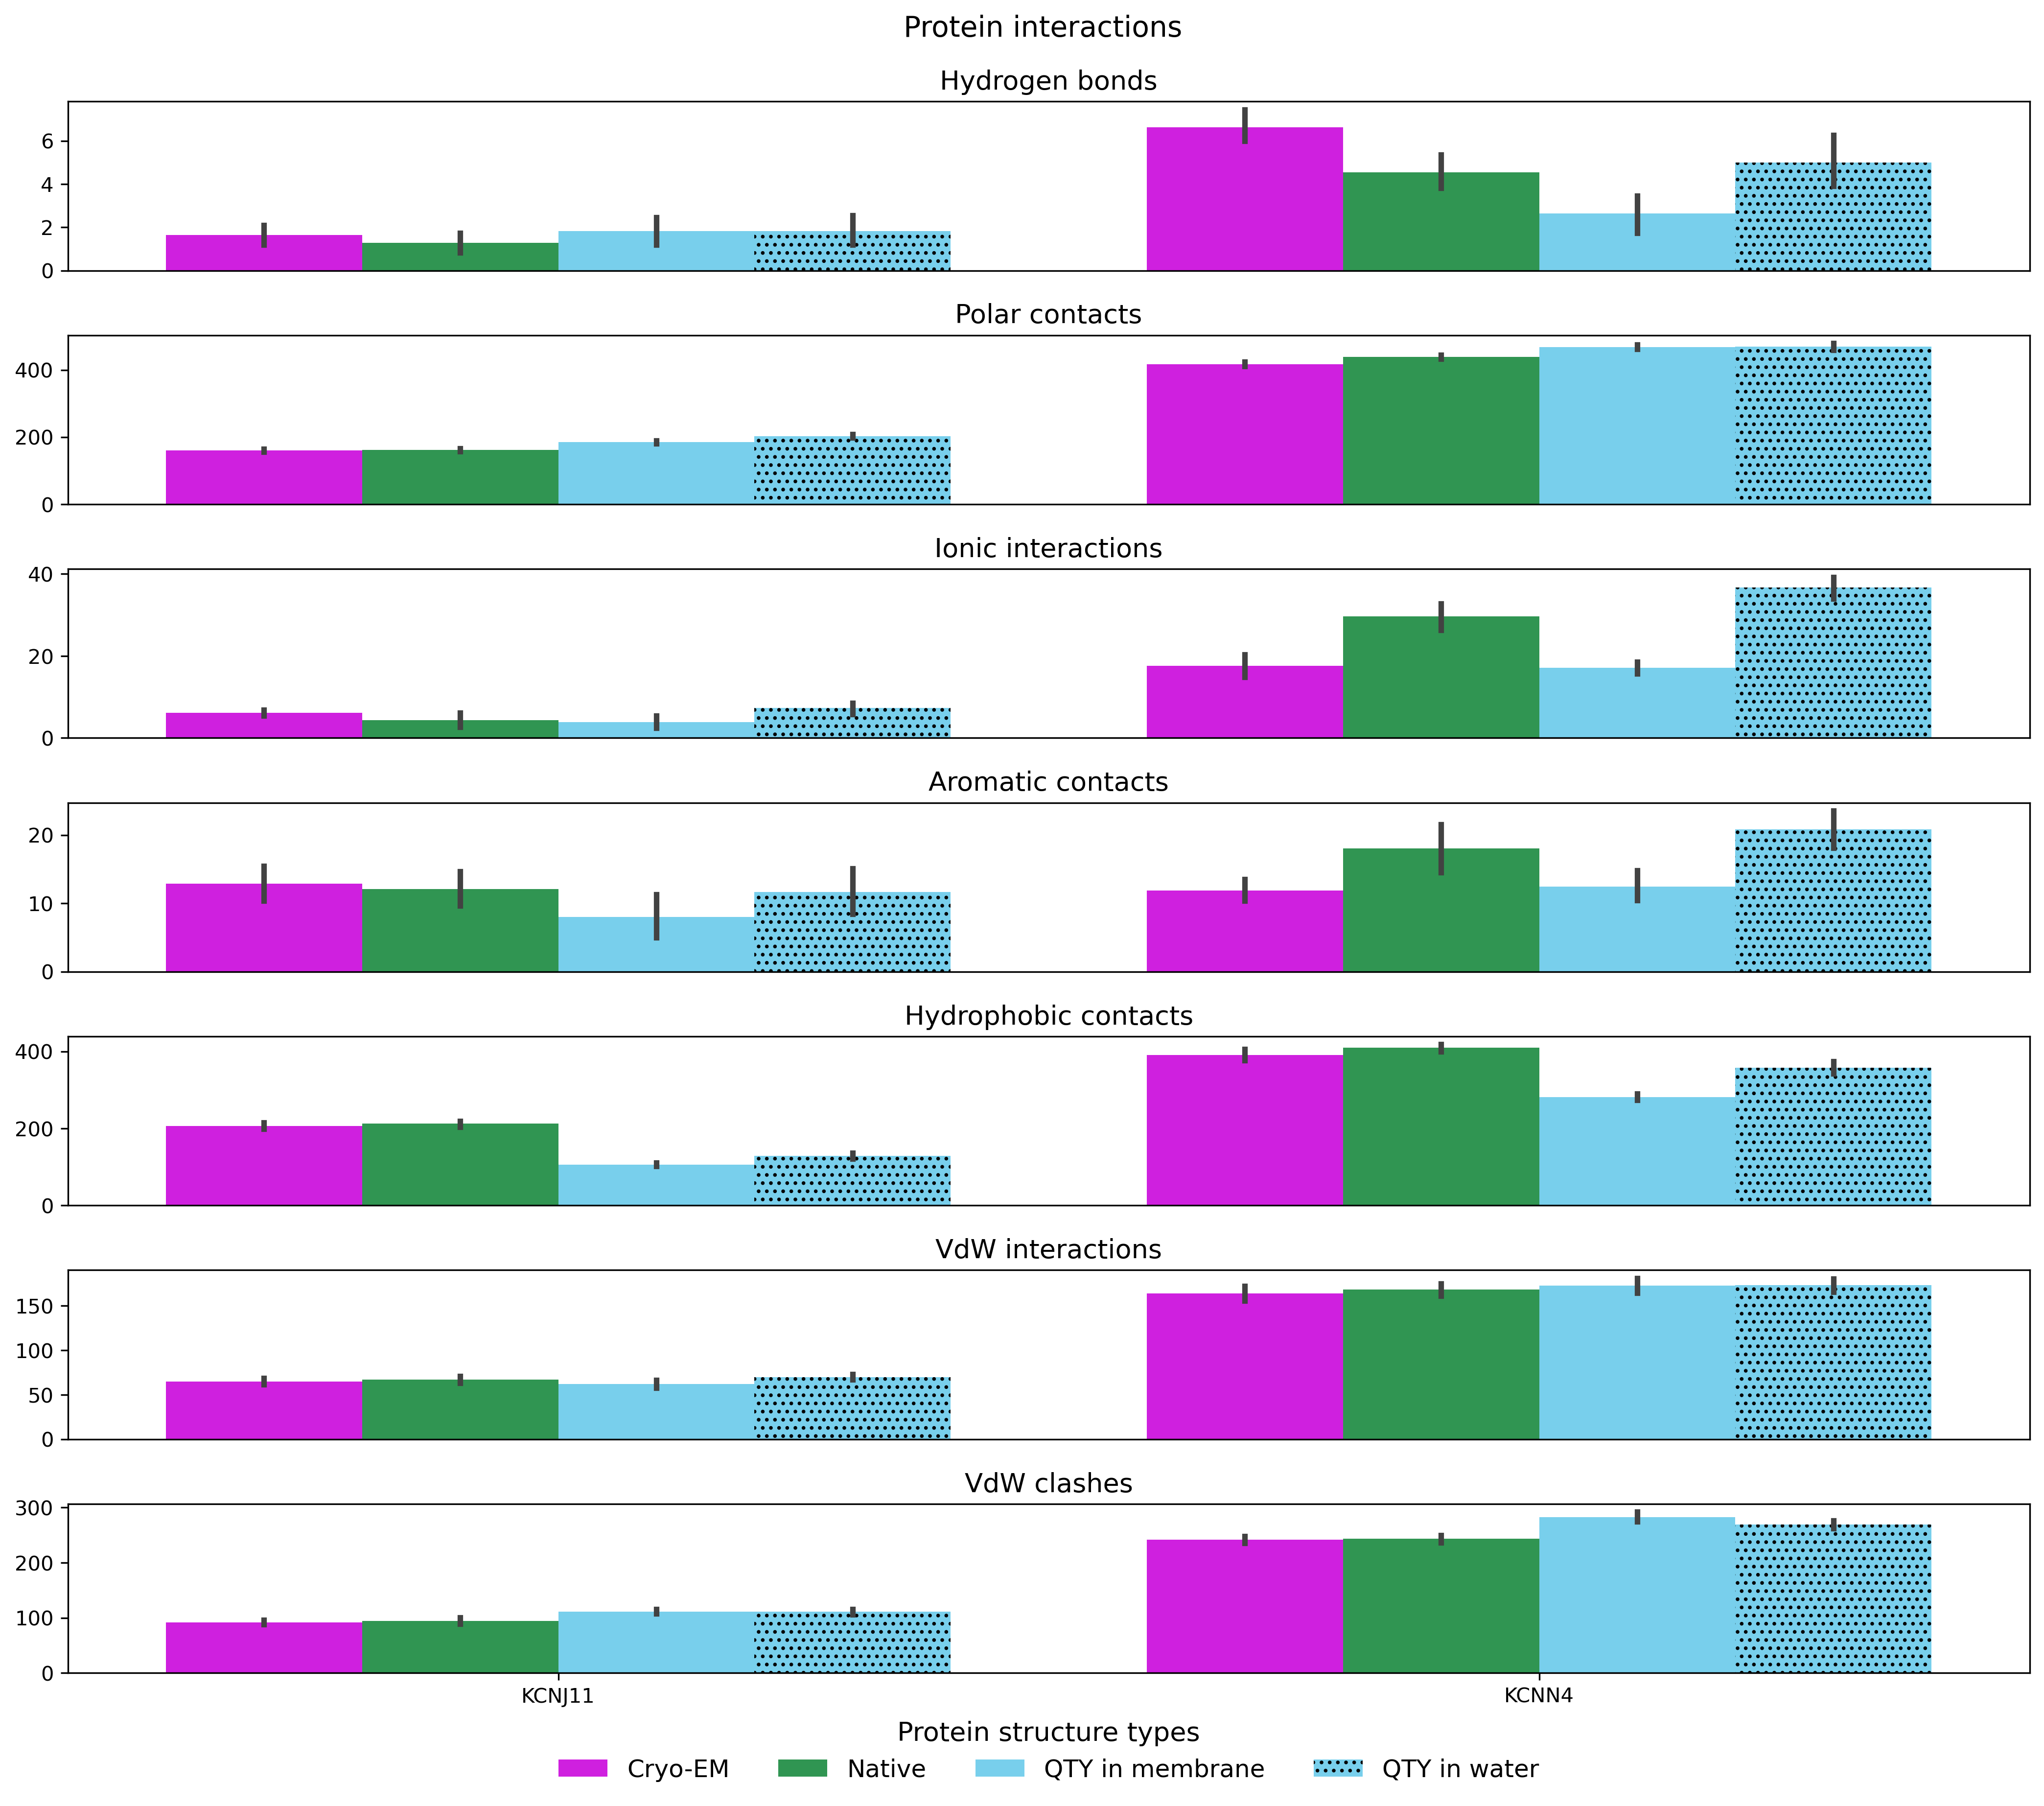

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 12), dpi=300)
axs = axs.flatten()

colors = {'Cryo-EM': '#EA00FF',
          'Native': '#1FA64D',
          'QTY in membrane': '#65D9FF',
          'QTY in water': '#65D9FF'}

parameters = ['hbond', 'polar', 'ionic', 'aromatic', 'hydrophobic', 'vdw', 'vdw_clash']
labels = ['Hydrogen bonds', 'Polar contacts', 'Ionic interactions', 'Aromatic contacts', 
          'Hydrophobic contacts', 'VdW interactions', 'VdW clashes']

for n, column in enumerate(parameters):
    barplot = sns.barplot(data=df, x='name', y=column, hue='type', ax=axs[n], palette=colors)
    axs[n].set_ylabel('')
    axs[n].set_xlabel('')
    axs[n].get_legend().remove()
    axs[n].set_title(f'{labels[n]}', fontsize=13)
    if not n == len(parameters) - 1:
        axs[n].set_xticks([])    

    # Apply hatch pattern to 'QTY in water' bars
    bars = barplot.patches
    for bar, hue in zip(bars, ['Cryo-EM', 'Cryo-EM', 'Native', 'Native', 'QTY in membrane', 'QTY in membrane', 'QTY in water', 'QTY in water'] * 7):
        #print(bar, hue)
        if hue == 'QTY in water':
            bar.set_hatch('...')  # You can choose different patterns like '/', 'x', etc.

legend = axs[n].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, 
                       fancybox=False, shadow=False, ncol=4, fontsize=12)    
legend.set_title('Protein structure types', prop={'size': 13})

fig.text(0.51, 1.007, 'Protein interactions', ha='center', fontsize=14)
    
plt.tight_layout(pad=1)
plt.savefig('./md_kcn_int_bar.png')

In [8]:
parameters = ['hbond', 'polar', 'ionic', 'aromatic', 'hydrophobic', 'vdw', 'vdw_clash']
labels = ['Hydrogen bonds', 'Polar contacts', 'Ionic interactions', 'Aromatic contacts', 
          'Hydrophobic contacts', 'VdW interactions', 'VdW clashes']

types = ['Cryo-EM', 'Native', 'QTY in membrane', 'QTY in water']
kw = {k: [] for k in parameters}

df = df.fillna(0)
for n, column in enumerate(parameters):
    groups = [df[df['type'] == t][column].values for t in types]
        
    kw_cryoem_qty_m = stats.kruskal(groups[0], groups[2])
    kw_qty_m_native = stats.kruskal(groups[2], groups[1])
    kw_cryoem_native = stats.kruskal(groups[0], groups[1])
    kw_cryoem_qty_w = stats.kruskal(groups[0], groups[3])
    kw_qty_w_native = stats.kruskal(groups[3], groups[1])
    kw_qty_m_qty_w = stats.kruskal(groups[2], groups[3])
    
    #kw_native_cryoem_qty = stats.kruskal(groups[0], groups[1], groups[2])
    
    kw[column].extend([kw_qty_m_native.pvalue, kw_cryoem_qty_m.pvalue, kw_cryoem_native.pvalue, 
                       kw_qty_w_native.pvalue, kw_cryoem_qty_w.pvalue, kw_qty_m_qty_w.pvalue])

In [9]:
pairs = [('Native', 'QTY in membrane'), ('Cryo-EM', 'QTY in membrane'), ('Native', 'Cryo-EM'), 
         ('Native', 'QTY in water'), ('Cryo-EM', 'QTY in water'), ('QTY in membrane', 'QTY in water')]
df_kw = pd.DataFrame(kw.values(), columns = pairs)
df_kw['parameters'] = kw.keys()
df_kw['parameters'] = df_kw['parameters'].replace({'hydrophobic': 'hydrophob', 'aromatic': 'arom'})
df_kw

,"(Native, QTY in membrane)","(Cryo-EM, QTY in membrane)","(Native, Cryo-EM)","(Native, QTY in water)","(Cryo-EM, QTY in water)","(QTY in membrane, QTY in water)",parameters
0,0.358335,0.037757,0.153406,0.536986,0.418108,0.088202,hbond
1,0.006693,0.005207,0.162216,0.007979,0.004841,0.129800,polar
2,0.144719,0.375574,0.547603,0.075919,0.021595,0.016503,ionic
3,0.014411,0.101847,0.187206,0.572592,0.043044,0.006637,arom
4,0.004493,0.004495,0.240294,0.007180,0.021394,0.007182,hydrophob
5,0.796141,0.962536,0.621783,0.445274,0.269614,0.341667,vdw
6,0.011215,0.005796,0.597096,0.020097,0.011212,0.510822,vdw_clash


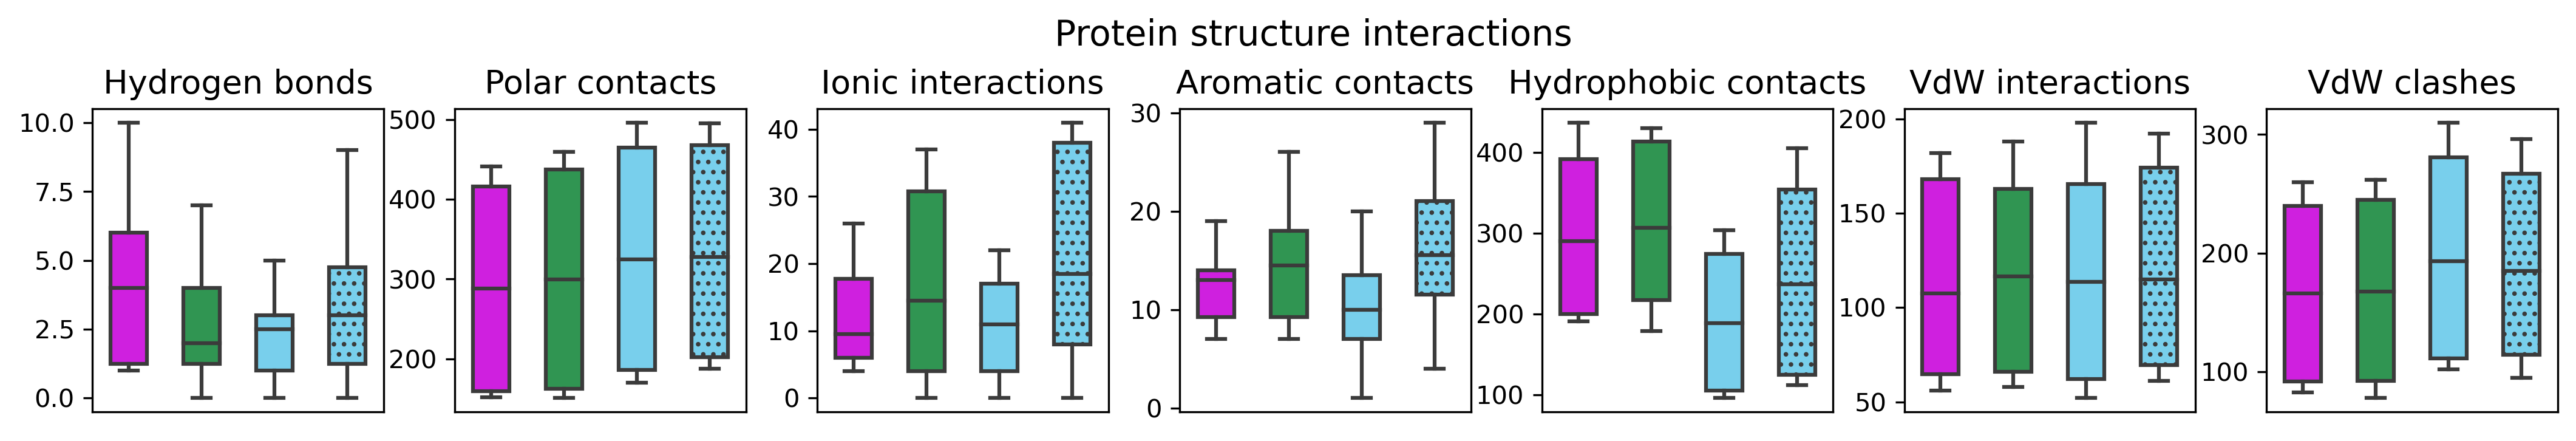

In [10]:
fig, axs = plt.subplots(nrows = 1, ncols = 7, figsize = (14, 2), dpi = 300)
plt.subplots_adjust(wspace=0.3)
axs = axs.flatten()

#colors = ['#65D9FF', '#1FA64D', '#EA00FF'] #  Native, QTY, Cryo-EM
#colors = ['#1FA64D', '#65D9FF', '#EA00FF'] #  Native, QTY, Cryo-EM
#sns.set_palette(sns.color_palette(colors))

colors = {'Cryo-EM': '#EA00FF',
          'Native': '#1FA64D',
          'QTY in membrane': '#65D9FF',
          'QTY in water': '#65D9FF'}

types = ['Cryo-EM', 'Native', 'QTY in membrane', 'QTY in water']
kw = {k: [] for k in parameters}

for n, column in enumerate(parameters):
    boxplot = sns.boxplot(data = df, y = column, x = 'type', width = 0.5,ax = axs[n], palette=colors)
    axs[n].set_ylabel('')
    axs[n].set_xlabel('')
    #axs[n].get_legend().remove()
    axs[n].set_title(f'{labels[n]}', fontsize = 13)
    axs[n].set_xticks([])
    #plt.setp(axs[n].xaxis.get_majorticklabels(), rotation=90)
    
    groups = [df[df['type'] == t][column].values for t in types]
        
    #kw_native_qty = stats.kruskal(groups[0], groups[2])
    #kw_native_cryoem = stats.kruskal(groups[0], groups[1])
    #kw_qty_cryoem = stats.kruskal(groups[2], groups[1])
    #kw_native_cryoem_qty = stats.kruskal(groups[0], groups[1], groups[2])
    #
    #kw[column].extend([kw_native_qty.pvalue, kw_native_cryoem.pvalue, kw_qty_cryoem.pvalue, kw_native_cryoem_qty.pvalue])

    kw_cryoem_qty_m = stats.kruskal(groups[0], groups[2])
    kw_qty_m_native = stats.kruskal(groups[2], groups[1])
    kw_cryoem_native = stats.kruskal(groups[0], groups[1])
    kw_cryoem_qty_w = stats.kruskal(groups[0], groups[3])
    kw_qty_w_native = stats.kruskal(groups[3], groups[1])
    kw_qty_m_qty_w = stats.kruskal(groups[2], groups[3])
    
    #kw_native_cryoem_qty = stats.kruskal(groups[0], groups[1], groups[2])
    
    kw[column].extend([kw_qty_m_native.pvalue, kw_cryoem_qty_m.pvalue, kw_cryoem_native.pvalue, 
                       kw_qty_w_native.pvalue, kw_cryoem_qty_w.pvalue, kw_qty_m_qty_w.pvalue])
    
    bars = boxplot.patches
    for bar, hue in zip(bars, ['Cryo-EM', 'Native', 'QTY in membrane', 'QTY in water'] * 7):
        #print(bar, hue)
        if hue == 'QTY in water':
            bar.set_hatch('...')  # You can choose different patterns like '/', 'x', etc.

#fig.text(0.5, -0.01, 'Proteins', ha='center', fontsize = 12)
#fig.text(-0.01, 0.5, 'Interactions', va='center', rotation='vertical', fontsize = 12)
fig.text(0.51, 1.05, 'Protein structure interactions', ha='center', fontsize = 14)


plt.tight_layout(pad = 0.2)
#plt.show()
plt.savefig('./md_kcn_int_box.png')

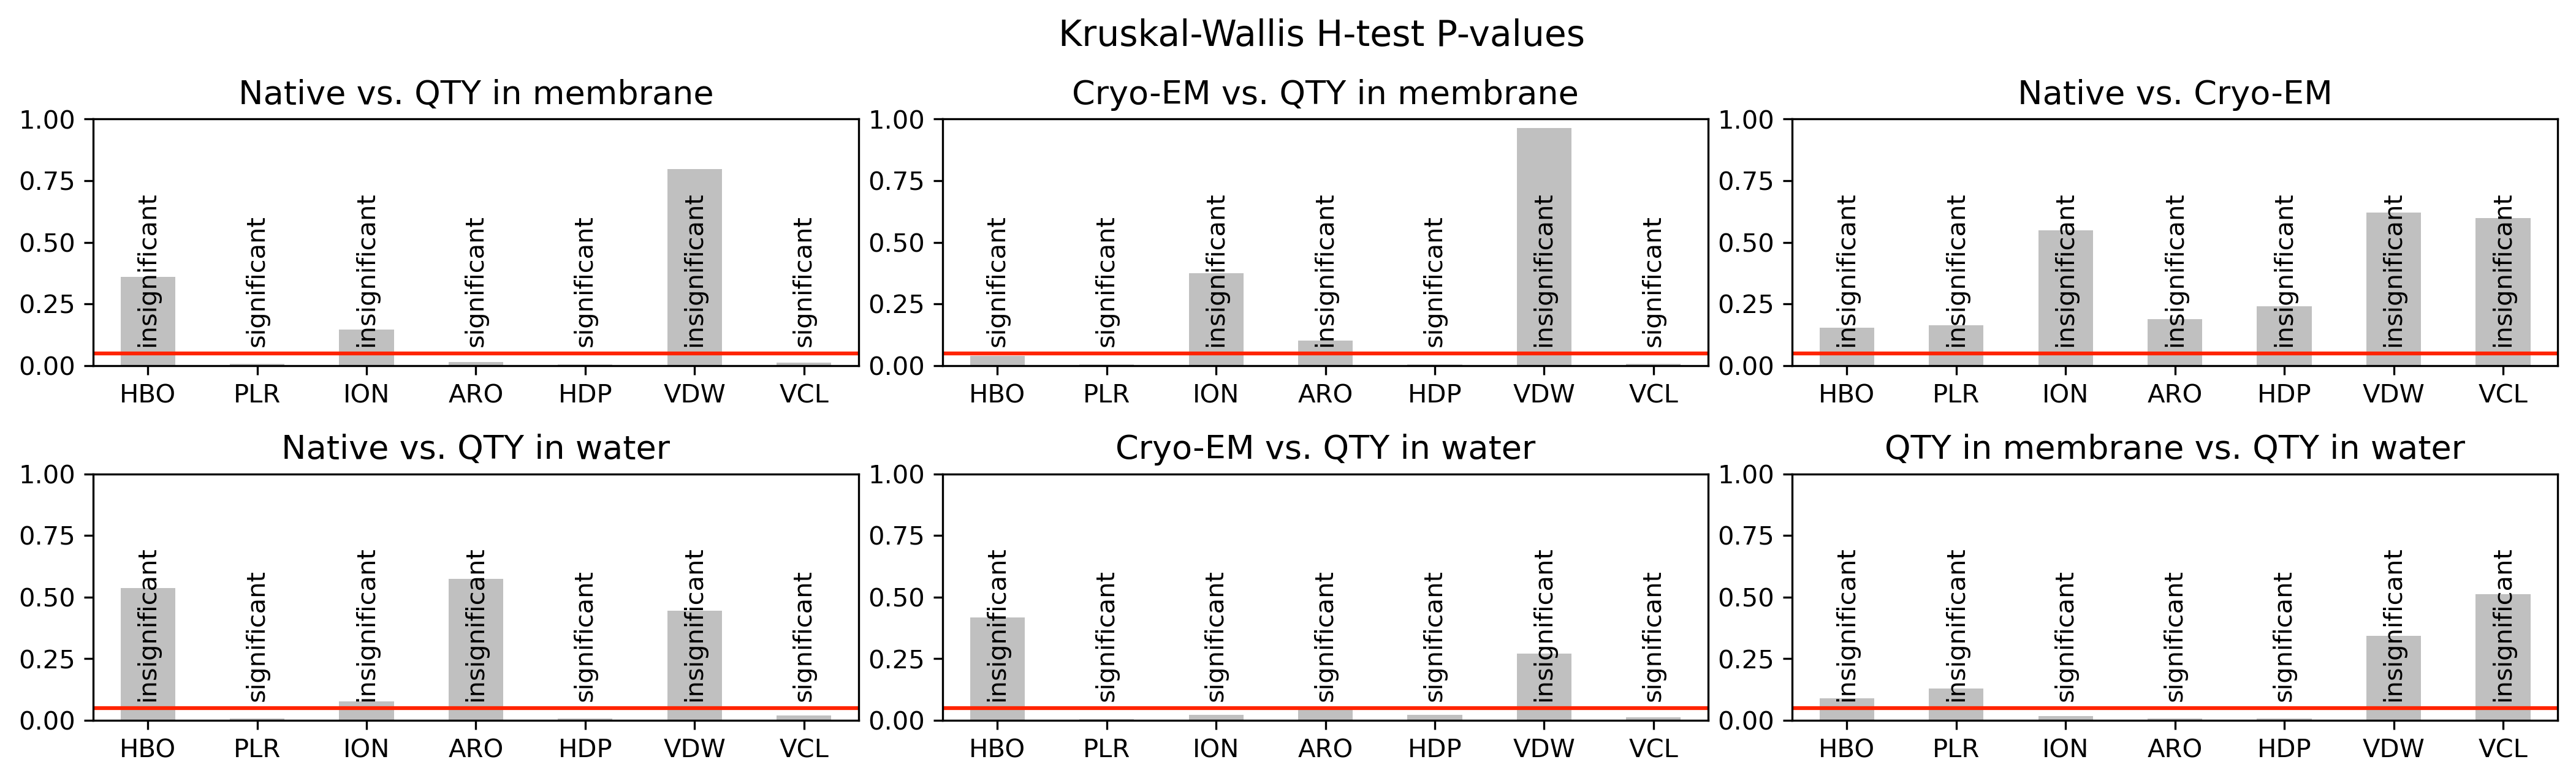

In [11]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 4), dpi = 300)
axs = axs.flatten()

#pairs = [('Native', 'Cryo-EM'), ('Native', 'QTY in membrane'), ('Cryo-EM', 'QTY in membrane'), 
#         ('Native', 'QTY in water'), ('Cryo-EM', 'QTY in water'), ('QTY in membrane', 'QTY in water')]

pairs = [('Native', 'QTY in membrane'), ('Cryo-EM', 'QTY in membrane'), ('Native', 'Cryo-EM'), 
         ('Native', 'QTY in water'), ('Cryo-EM', 'QTY in water'), ('QTY in membrane', 'QTY in water')]

df_kw = pd.DataFrame(kw.values(), columns = pairs)
df_kw['parameters'] = kw.keys()
df_kw['parameters'] = df_kw['parameters'].replace({'hbond': 'HBO',
                                                   'polar': 'PLR',
                                                   'ionic': 'ION',
                                                   'aromatic': 'ARO',
                                                   'hydrophobic': 'HDP',
                                                   'vdw': 'VDW',
                                                   'vdw_clash': 'VCL'})

for n, pair in enumerate(pairs):
    #df_kw = df_kw.sort_values(by = 'parameters')
    g = sns.barplot(data = df_kw, x = 'parameters', y = pair, width = 0.5, color = '#C0C0C0', ax = axs[n])
    g.axhline(0.05, color = '#FF2400')
    axs[n].set_ylabel('')
    axs[n].set_title(f'{" vs. ".join(pair)}', fontsize = 13)
    axs[n].set_xlabel('')
    axs[n].set_ylim(0, 1.0)
    
for m in range(6):
    for p in axs[m].patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + 0.1

        if p.get_height() >= 0.05:
            value = 'insignificant'
        elif p.get_height() < 0.05:
            value = 'significant'
        else:
            value = None

        axs[m].text(_x, _y, value, ha = "center", rotation = 90)
        #plt.setp(axs[m].get_xticklabels(), ha = 'center', rotation = 20)
    
fig.text(0.51, 1.01, 'Kruskal-Wallis H-test P-values', ha='center', fontsize = 14)    
plt.tight_layout(pad = 1.0)
#plt.show()
plt.savefig('./md_kcn_int_kw.png')